create gif from scans
This notebook contains code which will take a list of png files and compile a gif of the pngs. 
Since scans are taken multiple times each hour, to reduce file size the gif only take 1 frame per hour.
So each day will have rougly 24 to 25 frames.

In [1]:
import sys
from PIL import Image, ImageFont, ImageDraw
from os import listdir
from os.path import isfile, join
from datetime import datetime
from pytz import timezone

sys.path.append('../')
from envir import config

In [2]:
folder = config.dataFol+"explore/nexrad_downloads/May20/plots/"
fonts = config.dataFol+'explore/fonts/'
files = [f for f in listdir(folder) if isfile(join(folder, f))]
files = list(filter(lambda x : x.endswith('.png') , files))
files.sort()

In [3]:
def createLabelTimestamp(filename):
    """
    This function replaces the current png file with a labelled version of the file
    """
    newyork_tz = timezone('America/New_York')
    utc = timezone('UTC')
    timestamp = filename.split("_")
    datepart = timestamp[0][4:8]+'-'+timestamp[0][8:10]+'-'+timestamp[0][10:12]
    timepart = timestamp[1][:2]+':'+timestamp[1][2:4]+':'+timestamp[1][4:6]
    hour = timestamp[1][:2]
    utctimestamp = utc.localize(datetime.strptime(datepart+' '+timepart, '%Y-%m-%d %H:%M:%S'))
    nytime = utctimestamp.astimezone(newyork_tz)
    label = nytime.strftime("%d-%b-%Y (%H:%M:%S)")
    return([label, hour])


In [4]:
images = []
hour = 0
for f in files:
    label = createLabelTimestamp(f)
    if int(label[1]) == 0:        
        # get the image
        font = ImageFont.truetype(fonts+"OpenSans-Bold.ttf", 50)
        img = Image.open(folder+f)
        draw = ImageDraw.Draw(img)
        draw.text((150,10), label[0], (0,0,0), font=font)
        draw = ImageDraw.Draw(img)
        images.append(img)
    elif int(label[1]) > hour:
        hour = int(label[1])
        # get the image
        font = ImageFont.truetype(fonts+"OpenSans-Bold.ttf", 50)
        img = Image.open(folder+f)
        draw = ImageDraw.Draw(img)
        draw.text((150,10), label[0], (0,0,0), font=font)
        draw = ImageDraw.Draw(img)
        images.append(img)

In [5]:
images[0].save('KOKX20200520_hourly.gif', format='GIF', append_images=images[1:],
         save_all=True, duration=500, loop=0)

In [6]:
len(images)

29

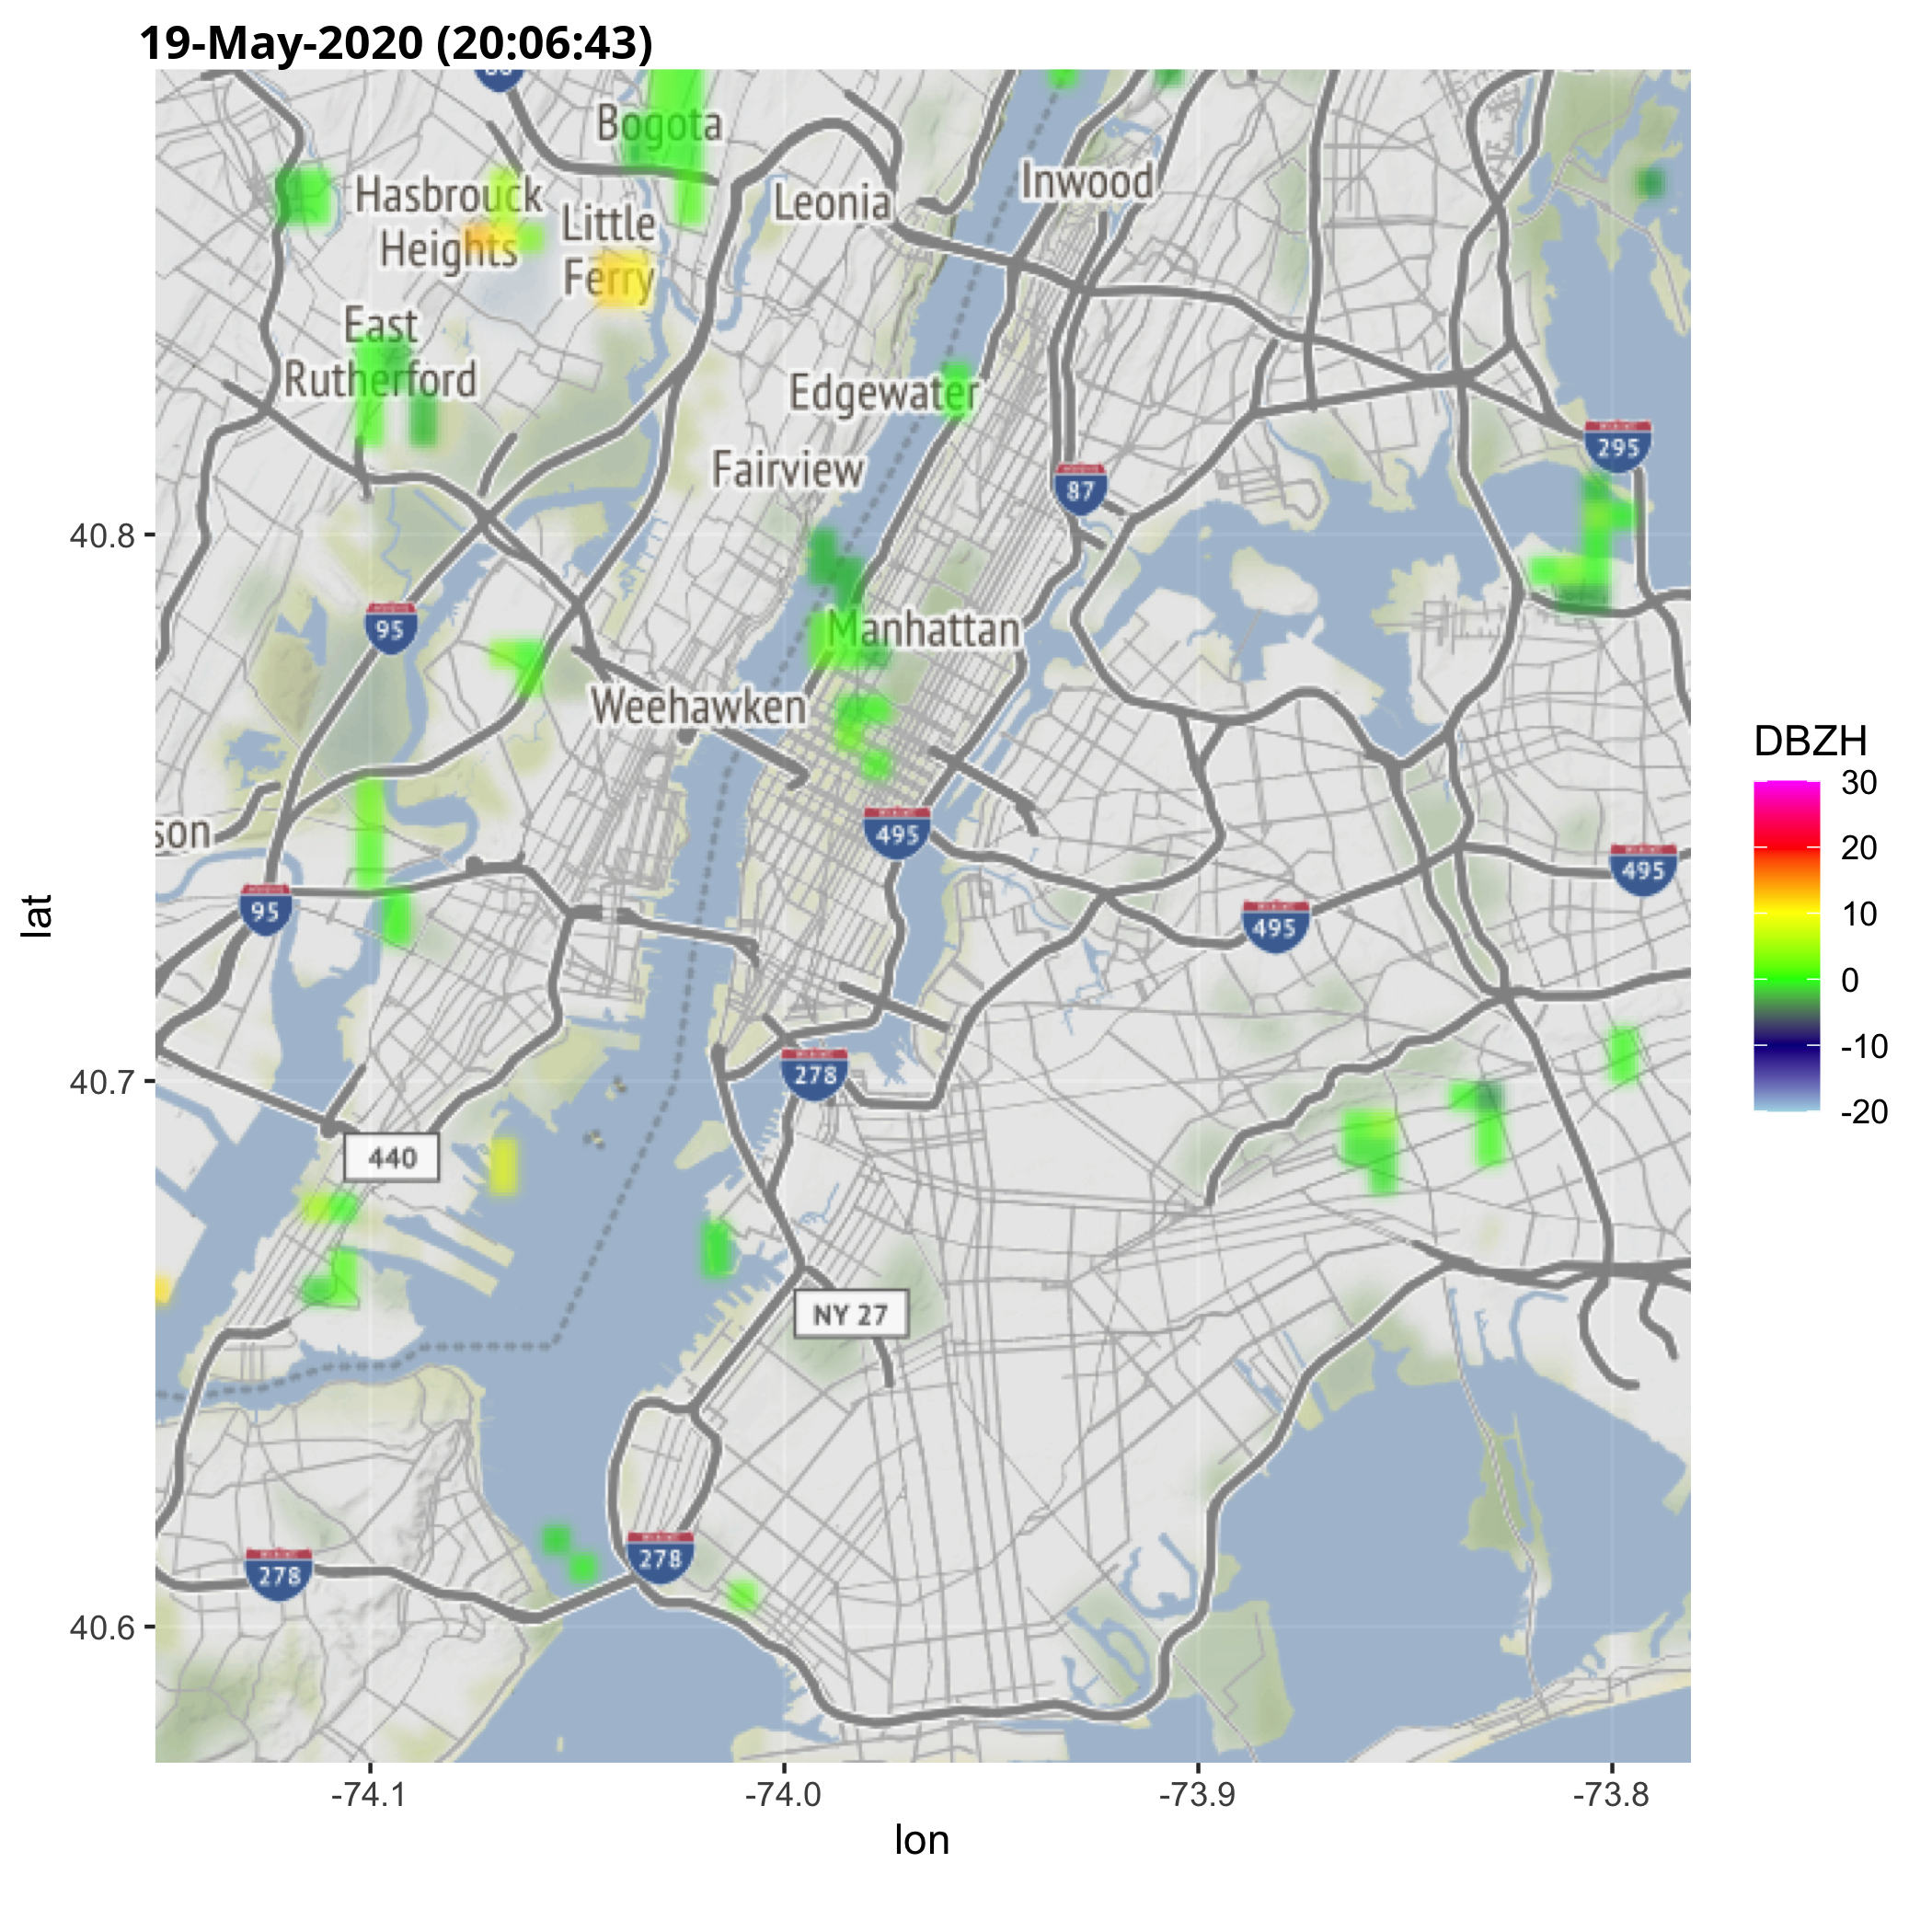

In [7]:
images[0]